In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
# Load your dataset
df = pd.read_csv("Overview.csv")

# Create binary label based on sensor faults
df['Faulty Transformer'] = df[['WTI', 'OTI_A', 'OTI_T', 'MOG_A']].any(axis=1).map({True: 'Yes', False: 'No'})
df.drop(columns=['WTI', 'OTI_A', 'OTI_T', 'MOG_A'], inplace=True)

# Encode label: Yes = 1 (fault), No = 0 (healthy)
df['Faulty Transformer'] = df['Faulty Transformer'].map({'Yes': 1, 'No': 0})

In [3]:
# Separate features and labels
X = df.drop(columns=['Faulty Transformer'])

# Drop non-numeric columns like datetime if present
X = X.select_dtypes(include=[np.number])

y = df['Faulty Transformer']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [4]:
models = {
    "SVM": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }


C:\Users\mailb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:32:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale the resampled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the resampled and scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest as an example
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train the best model on the full training set
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.8669152373850361
Test Accuracy: 0.8681646450586598
Precision: 0.8041935483870968
Recall: 0.9780306002353865
F1 Score: 0.8826340945300053


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from pytorch_tabnet.tab_model import TabNetClassifier

# Load dataset
df = pd.read_csv("Overview.csv")

# Create binary label based on sensor faults
df['Faulty Transformer'] = df[['WTI', 'OTI_A', 'OTI_T', 'MOG_A']].any(axis=1).map({True: 'Yes', False: 'No'})
df.drop(columns=['WTI', 'OTI_A', 'OTI_T', 'MOG_A'], inplace=True)

# Encode label: Yes = 1 (fault), No = 0 (healthy)
df['Faulty Transformer'] = df['Faulty Transformer'].map({'Yes': 1, 'No': 0})

# Separate features and labels
X = df.drop(columns=['Faulty Transformer'])
X = X.select_dtypes(include=[np.number])  # Drop non-numeric columns
y = df['Faulty Transformer']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# 1. Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1': f1_score(y_test, y_pred_rf)
}

# 2. SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1': f1_score(y_test, y_pred_svm)
}

# 3. KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
results['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1': f1_score(y_test, y_pred_knn)
}

# 4. XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1': f1_score(y_test, y_pred_xgb)
}

# 5. ANN
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
results['ANN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_ann),
    'Precision': precision_score(y_test, y_pred_ann),
    'Recall': recall_score(y_test, y_pred_ann),
    'F1': f1_score(y_test, y_pred_ann)
}

# Deep Learning Models
# Reshape data for deep learning models
X_train_dl = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_dl = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 6. LSTM
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_dl.shape[1], X_train_dl.shape[2]), activation='tanh'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_dl, y_train, epochs=20, batch_size=32, verbose=1)
lstm_preds = (lstm_model.predict(X_test_dl) > 0.5).astype(int)
results['LSTM'] = {
    'Accuracy': accuracy_score(y_test, lstm_preds),
    'Precision': precision_score(y_test, lstm_preds),
    'Recall': recall_score(y_test, lstm_preds),
    'F1': f1_score(y_test, lstm_preds)
}

# 7. GRU
gru_model = Sequential([
    GRU(64, input_shape=(X_train_dl.shape[1], X_train_dl.shape[2]), activation='tanh'),
    Dense(1, activation='sigmoid')
])
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
gru_model.fit(X_train_dl, y_train, epochs=20, batch_size=32, verbose=1)
gru_preds = (gru_model.predict(X_test_dl) > 0.5).astype(int)
results['GRU'] = {
    'Accuracy': accuracy_score(y_test, gru_preds),
    'Precision': precision_score(y_test, gru_preds),
    'Recall': recall_score(y_test, gru_preds),
    'F1': f1_score(y_test, gru_preds)
}

# 8. 1D-CNN
cnn_model = Sequential([
    Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train_dl.shape[1], X_train_dl.shape[2])),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_dl, y_train, epochs=20, batch_size=32, verbose=1)
cnn_preds = (cnn_model.predict(X_test_dl) > 0.5).astype(int)
results['1D-CNN'] = {
    'Accuracy': accuracy_score(y_test, cnn_preds),
    'Precision': precision_score(y_test, cnn_preds),
    'Recall': recall_score(y_test, cnn_preds),
    'F1': f1_score(y_test, cnn_preds)
}

# 9. TabNet
tabnet_model = TabNetClassifier(verbose=1, seed=42)
tabnet_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric=['accuracy'], max_epochs=50, patience=10, batch_size=256)
tabnet_preds = tabnet_model.predict(X_test)
results['TabNet'] = {
    'Accuracy': accuracy_score(y_test, tabnet_preds),
    'Precision': precision_score(y_test, tabnet_preds),
    'Recall': recall_score(y_test, tabnet_preds),
    'F1': f1_score(y_test, tabnet_preds)
}

# Print results
print("\n🔍 Model Performance:\n")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\mailb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:01:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Epoch 1/20


C:\Users\mailb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


629/629 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6709 - loss: 0.6447
Epoch 2/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7143 - loss: 0.5754
Epoch 3/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7252 - loss: 0.5201
Epoch 4/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7540 - loss: 0.4787
Epoch 5/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7883 - loss: 0.4463
Epoch 6/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8070 - loss: 0.4243
Epoch 7/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8133 - loss: 0.4110
Epoch 8/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8185 - loss: 0.4016
Epoch 9/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8209 - loss: 0.3941
Epoch 10/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8238 - loss: 0.3879
Epoch 11/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8267 - loss: 0.3826
Epoch 12/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy

C:\Users\mailb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


629/629 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6572 - loss: 0.6434
Epoch 2/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7021 - loss: 0.5935
Epoch 3/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7210 - loss: 0.5390
Epoch 4/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7440 - loss: 0.4978
Epoch 5/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7831 - loss: 0.4610
Epoch 6/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8108 - loss: 0.4286
Epoch 7/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8173 - loss: 0.4135
Epoch 8/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8209 - loss: 0.4027
Epoch 9/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8250 - loss: 0.3941
Epoch 10/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8273 - loss: 0.3870
Epoch 11/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8305 - loss: 0.3808
Epoch 12/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy

C:\Users\mailb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


629/629 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6763 - loss: 0.6128
Epoch 2/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7462 - loss: 0.4982
Epoch 3/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7725 - loss: 0.4588
Epoch 4/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7884 - loss: 0.4394
Epoch 5/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7970 - loss: 0.4233
Epoch 6/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8131 - loss: 0.4093
Epoch 7/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8198 - loss: 0.3976
Epoch 8/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8272 - loss: 0.3865
Epoch 9/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8298 - loss: 0.3792
Epoch 10/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8351 - loss: 0.3722
Epoch 11/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8336 - loss: 0.3680
Epoch 12/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy

C:\Users\mailb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.53481 | val_0_accuracy: 0.72559 |  0:00:04s
epoch 1  | loss: 0.40291 | val_0_accuracy: 0.73056 |  0:00:10s
epoch 2  | loss: 0.36026 | val_0_accuracy: 0.78405 |  0:00:15s
epoch 3  | loss: 0.35445 | val_0_accuracy: 0.79996 |  0:00:20s
epoch 4  | loss: 0.35353 | val_0_accuracy: 0.57288 |  0:00:25s
epoch 5  | loss: 0.34275 | val_0_accuracy: 0.74309 |  0:00:30s
epoch 6  | loss: 0.35787 | val_0_accuracy: 0.71903 |  0:00:35s
epoch 7  | loss: 0.35564 | val_0_accuracy: 0.83933 |  0:00:40s
epoch 8  | loss: 0.3388  | val_0_accuracy: 0.53967 |  0:00:45s
epoch 9  | loss: 0.34    | val_0_accuracy: 0.68821 |  0:00:50s
epoch 10 | loss: 0.45274 | val_0_accuracy: 0.73633 |  0:00:55s
epoch 11 | loss: 0.37766 | val_0_accuracy: 0.73355 |  0:01:01s
epoch 12 | loss: 0.35802 | val_0_accuracy: 0.49553 |  0:01:05s
epoch 13 | loss: 0.34034 | val_0_accuracy: 0.74389 |  0:01:10s
epoch 14 | loss: 0.33345 | val_0_accuracy: 0.73852 |  0:01:16s
epoch 15 | loss: 0.33349 | val_0_accuracy: 0.66216 |  0

C:\Users\mailb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🔍 Model Performance:

Random Forest:
  Accuracy: 0.8682
  Precision: 0.8042
  Recall: 0.9780
  F1: 0.8826

SVM:
  Accuracy: 0.8604
  Precision: 0.7933
  Recall: 0.9800
  F1: 0.8768

KNN:
  Accuracy: 0.8624
  Precision: 0.8129
  Recall: 0.9463
  F1: 0.8745

XGBoost:
  Accuracy: 0.8680
  Precision: 0.8045
  Recall: 0.9769
  F1: 0.8824

ANN:
  Accuracy: 0.8632
  Precision: 0.8030
  Recall: 0.9674
  F1: 0.8776

LSTM:
  Accuracy: 0.8491
  Precision: 0.7964
  Recall: 0.9435
  F1: 0.8637

GRU:
  Accuracy: 0.8560
  Precision: 0.7920
  Recall: 0.9710
  F1: 0.8724

1D-CNN:
  Accuracy: 0.8630
  Precision: 0.7966
  Recall: 0.9800
  F1: 0.8788

TabNet:
  Accuracy: 0.8393
  Precision: 0.7606
  Recall: 0.9969
  F1: 0.8628



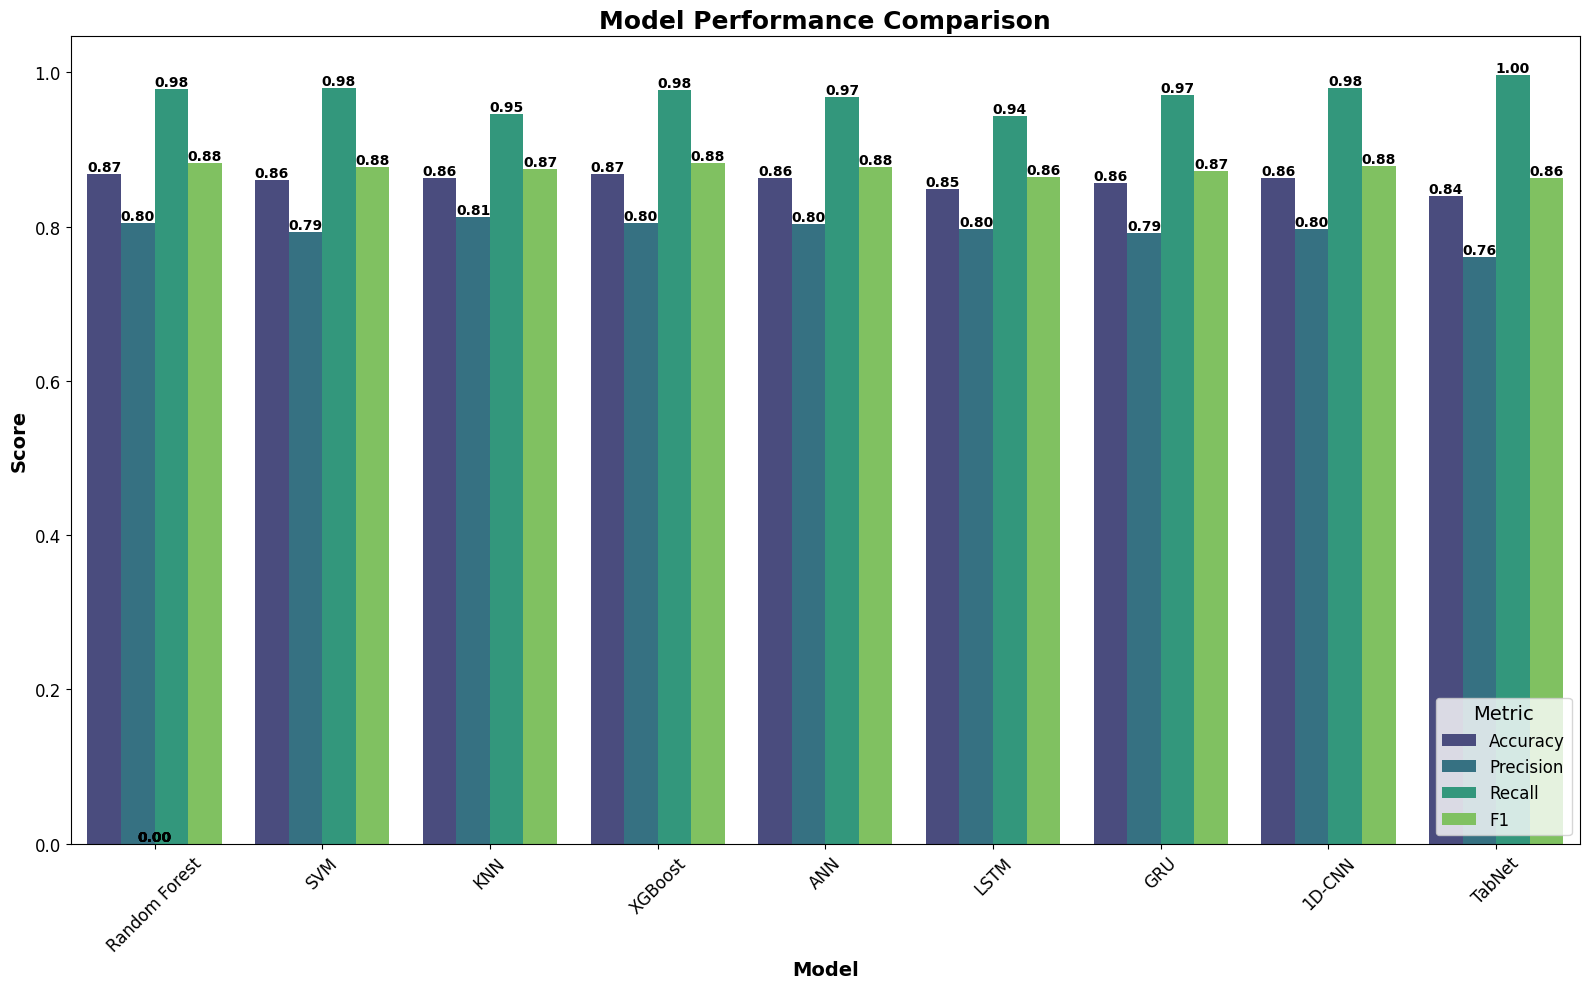

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dictionary to a DataFrame for easier visualization
results_df = pd.DataFrame(results).T  # Transpose to have models as rows
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame for grouped bar chart
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(16, 10))
barplot = sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='viridis')

# Add labels on top of each bar
for bar in barplot.patches:
    bar_height = bar.get_height()
    barplot.annotate(
        f'{bar_height:.2f}',  # Format the label to 2 decimal places
        (bar.get_x() + bar.get_width() / 2, bar_height),  # Position at the center of the bar
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
    )

# Customize the chart
plt.title('Model Performance Comparison', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.legend(title='Metric', title_fontsize=14, fontsize=12)
plt.tight_layout()

plt.show()

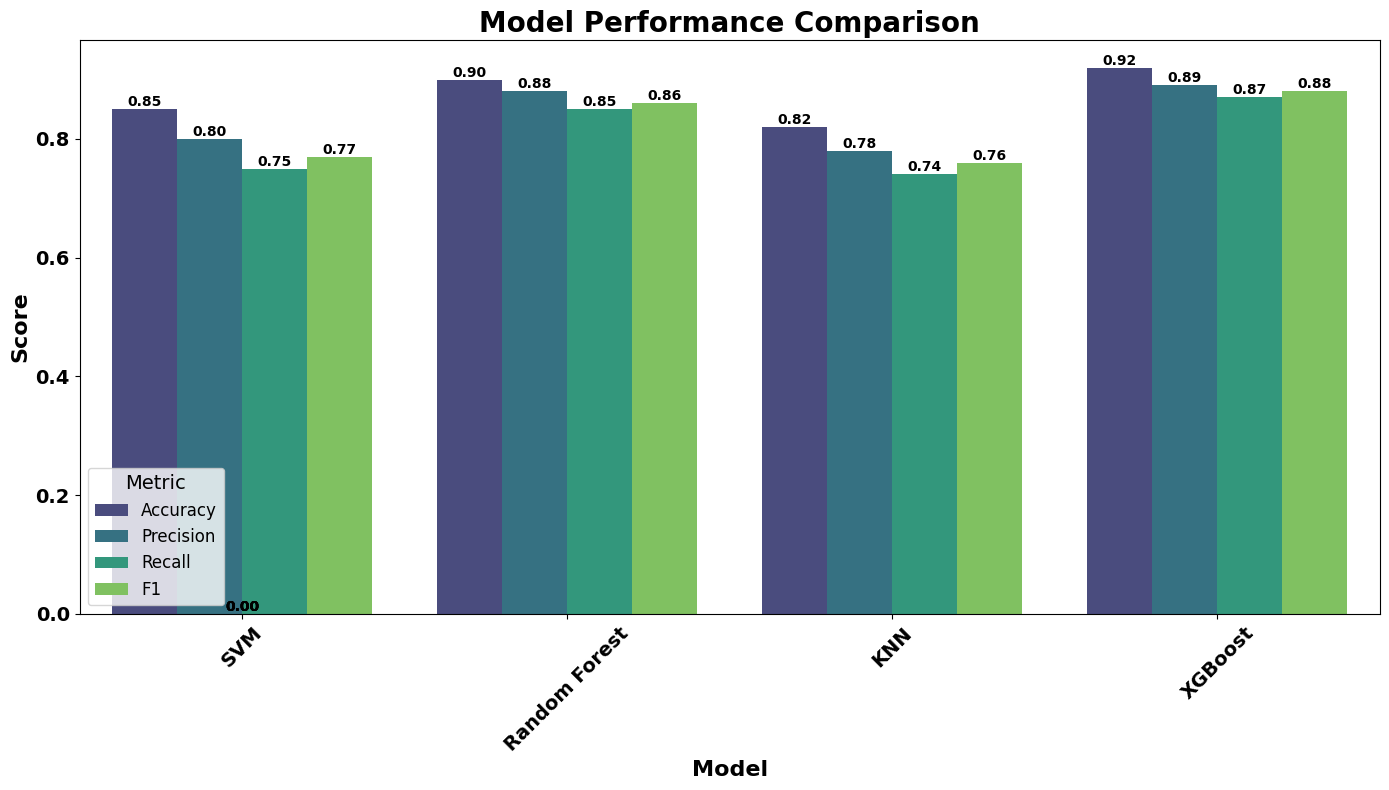

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example results dictionary
results = {
    'SVM': {'Accuracy': 0.85, 'Precision': 0.80, 'Recall': 0.75, 'F1': 0.77},
    'Random Forest': {'Accuracy': 0.90, 'Precision': 0.88, 'Recall': 0.85, 'F1': 0.86},
    'KNN': {'Accuracy': 0.82, 'Precision': 0.78, 'Recall': 0.74, 'F1': 0.76},
    'XGBoost': {'Accuracy': 0.92, 'Precision': 0.89, 'Recall': 0.87, 'F1': 0.88}
}

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results).T  # Transpose to have models as rows
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame for grouped bar chart
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='viridis')

# Add labels on top of each bar
for bar in barplot.patches:
    bar_height = bar.get_height()
    barplot.annotate(
        f'{bar_height:.2f}',  # Format the label to 2 decimal places
        (bar.get_x() + bar.get_width() / 2, bar_height),  # Position at the center of the bar
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
    )

# Customize the chart
plt.title('Model Performance Comparison', fontsize=20, fontweight='bold')
plt.xlabel('Model', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.legend(title='Metric', title_fontsize=14, fontsize=12)
plt.tight_layout()

plt.show()